# sector 9

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
# data = get_output('../combined_dataframe.txt')
# data.head()

In [3]:
data = get_output('../output_log/s9.txt')
length = len(data)

- Change path to storage

In [4]:
data = data[data.transit_prob == 'maybeTransit']
data['abs_path'] = data['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
print(len(data), f"after maybeTransit, {len(data)/length *100}% candidates remain")
data.head()

290900 after maybeTransit, 42.8278450188522% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path
1,/tmp/tess/tesslcs_sector_9_104/tesslcs_tmag_10...,101185432,-4.76159,-3.12703,1553.22445,0.92861,0.00000,770.29316,30.00000,0.000000e+00,...,148.91665,160.43277,0.97971,1.05548,0.00048,0.00050,0.00039,0.00041,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
3,/tmp/tess/tesslcs_sector_9_104/2_min_cadence_t...,260128701,-8.58726,-2.85116,1546.21959,0.99997,0.00138,0.47267,-0.00006,7.070656e+06,...,2304.24478,2304.18754,26.79354,26.79288,0.00048,0.00048,0.00040,0.00040,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
4,/tmp/tess/tesslcs_sector_9_104/tesslcs_tmag_10...,29584791,-4.86014,-3.37667,1566.65947,1.09308,0.00099,1.02109,11.63088,9.878680e+00,...,99.25917,90.41227,0.70899,0.64580,0.00046,0.00044,0.00035,0.00034,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
7,/tmp/tess/tesslcs_sector_9_104/tesslcs_tmag_10...,310309296,-9.90355,-2.49080,1552.30400,0.85938,0.00000,483.44294,-30.00000,0.000000e+00,...,2402.38304,2798.85961,9.45820,11.01913,0.00130,0.00140,0.00096,0.00110,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
8,/tmp/tess/tesslcs_sector_9_104/tesslcs_tmag_10...,140523828,-9.52588,-3.29514,1548.95129,1.02932,0.00093,0.34021,10.42021,9.770550e+00,...,252.86512,245.90748,2.43140,2.36449,0.00085,0.00084,0.00065,0.00066,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...


## Removing worst anomalies

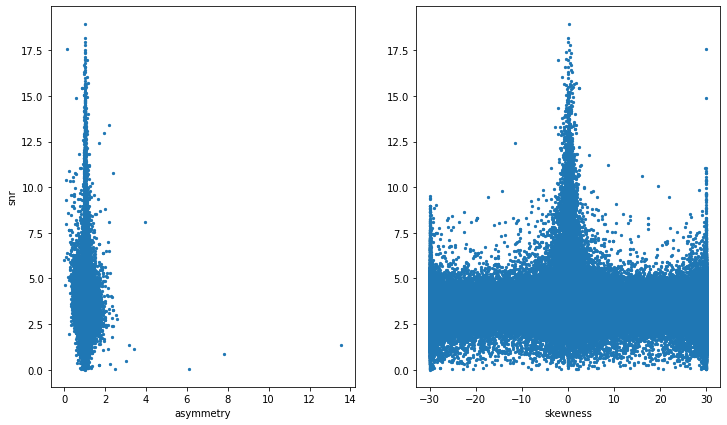

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)

---

### Some EDA

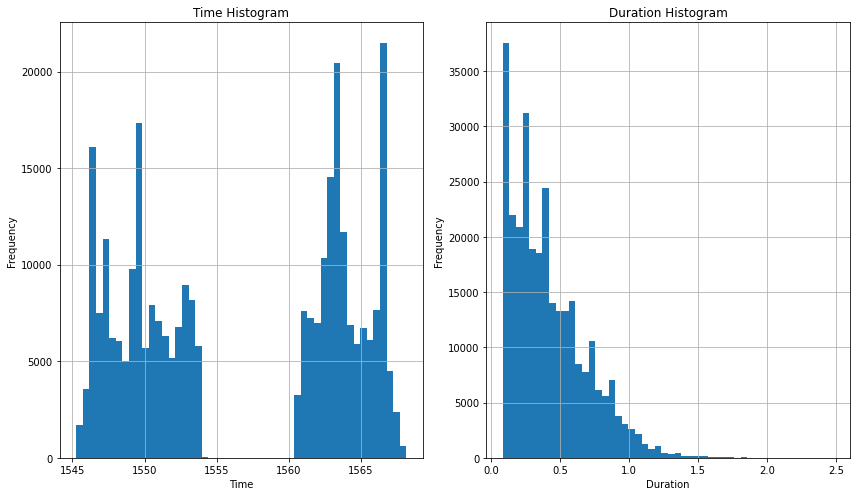

In [7]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

## SNR cut

In [8]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
len(data_new)

9857

## Duration cut

In [9]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

## Depth cut

In [10]:
data_new['abs_depth'] = abs(data_new.depth)

In [11]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

---

## Remaining Candidates

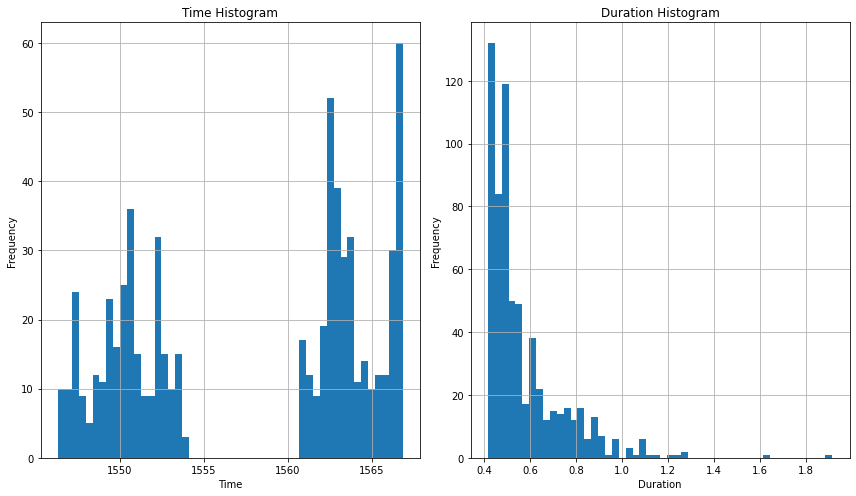

In [12]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data_new['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data_new['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

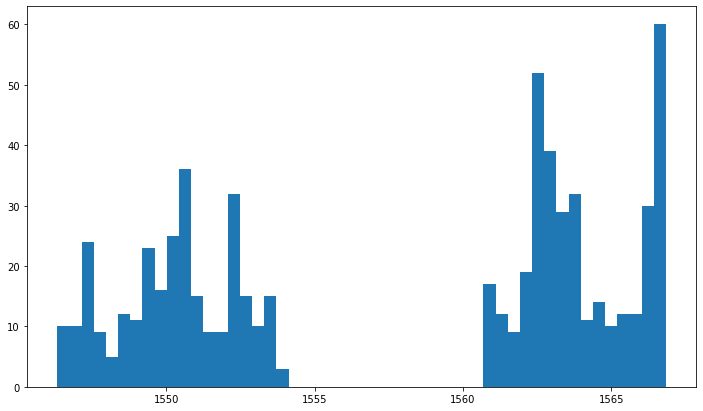

In [13]:
hist_values, bin_edges, _ = plt.hist(data_new['time'], bins=50)
#duration_hist_values, duration_bin_edges, _ = plt.hist(data_new['duration'], bins=50)

# Find the index of the bin with the maximum count
max_bin_index = np.argmax(hist_values)

# Retrieve the bin count and bin edges for the bin with the most count
max_bin_count = hist_values[max_bin_index]
bin_left_edge = bin_edges[max_bin_index]
bin_right_edge = bin_edges[max_bin_index + 1]

In [14]:
hist_values

array([10., 10., 24.,  9.,  5., 12., 11., 23., 16., 25., 36., 15.,  9.,
        9., 32., 15., 10., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17., 12.,  9., 19.,
       52., 39., 29., 32., 11., 14., 10., 12., 12., 30., 60.])

In [15]:
# # Filter the DataFrame for data within the specified time bin
# subset_data = data_new[(data_new['time'] >= bin_left_edge) ]

# # Calculate the histogram for the 'duration' column within the time bin
# duration_hist_values, duration_bin_edges = np.histogram(subset_data['duration'], bins=50)

# max_duration_bin_index = np.argmax(duration_hist_values)

# # Retrieve the bin count and bin edges for the most common duration bin within the time bin
# max_duration_bin_count = duration_hist_values[max_duration_bin_index]
# duration_bin_left_edge = duration_bin_edges[max_duration_bin_index]
# duration_bin_right_edge = duration_bin_edges[max_duration_bin_index + 1]

# plt.hist(subset_data['duration'], bins=10, alpha=0.7)  # Adjust color and alpha as desired
# plt.show()

In [16]:
print(bin_left_edge, "start of bin")
print(bin_right_edge, "end of bin")
print(max_bin_count, "number of lcs")

1566.4363614000001 start of bin
1566.84677 end of bin
60.0 number of lcs


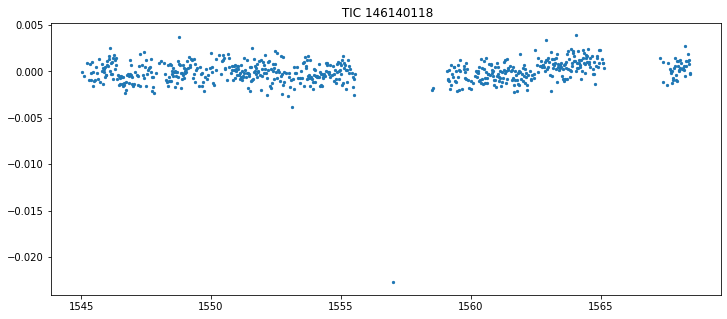

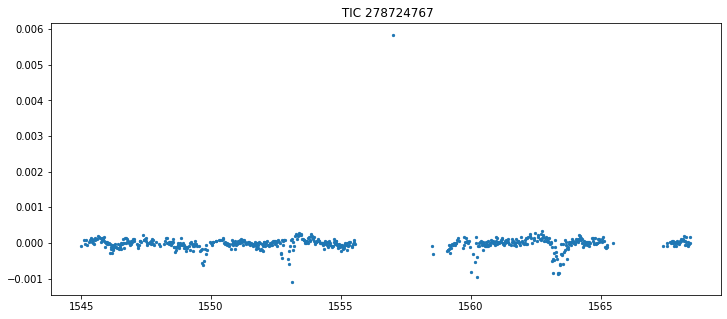

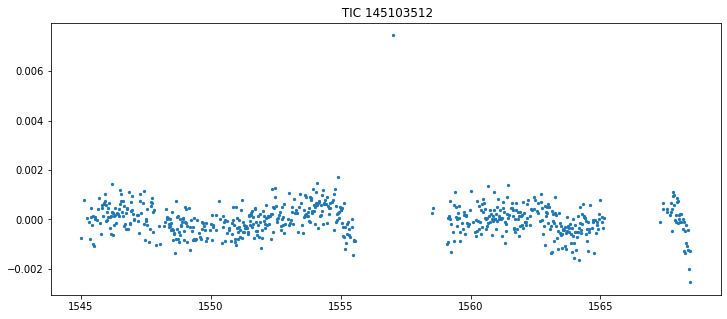

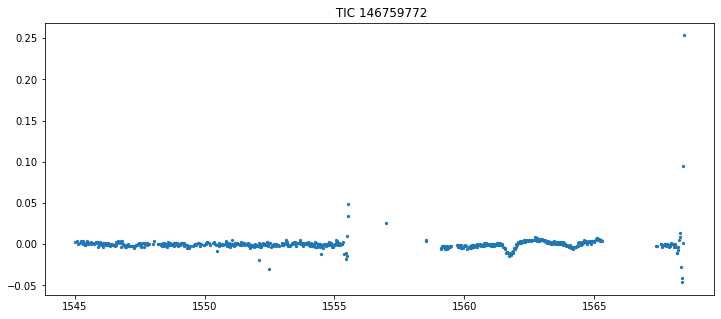

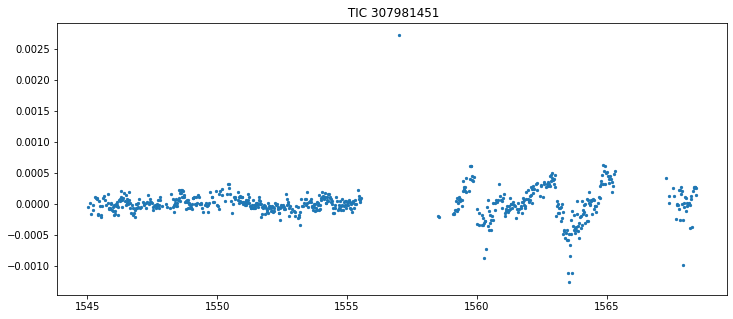

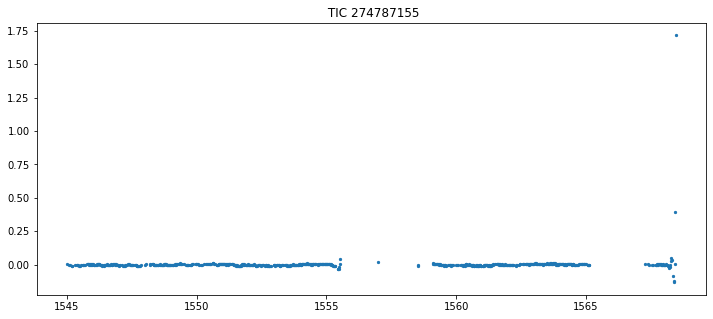

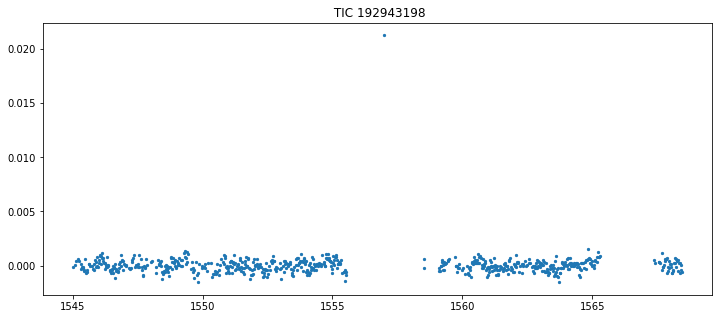

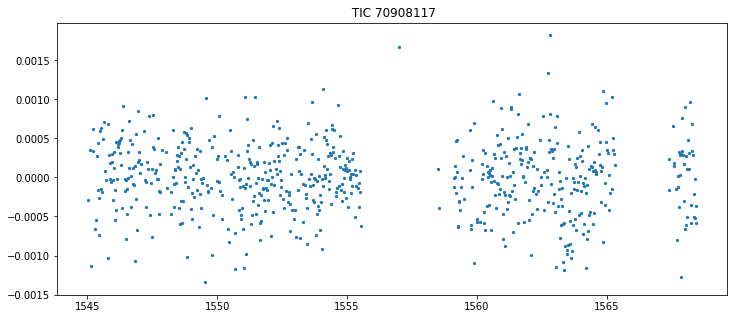

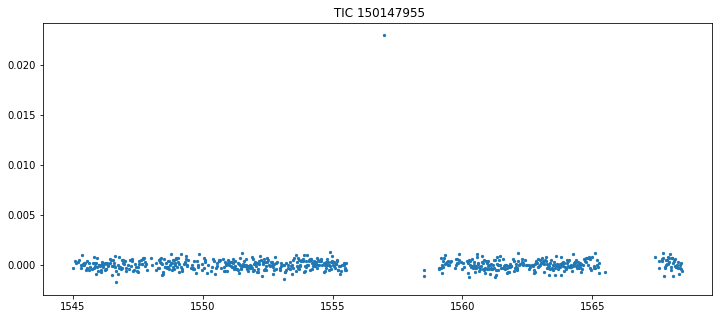

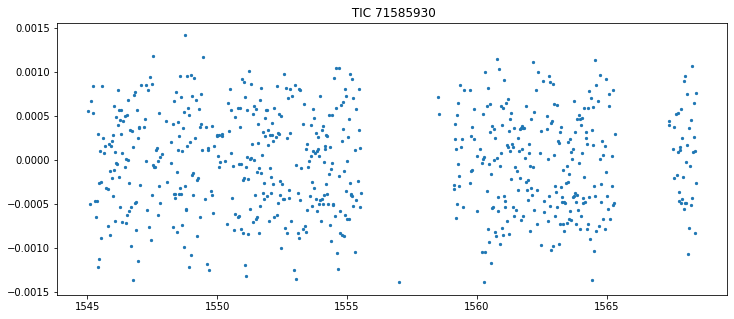

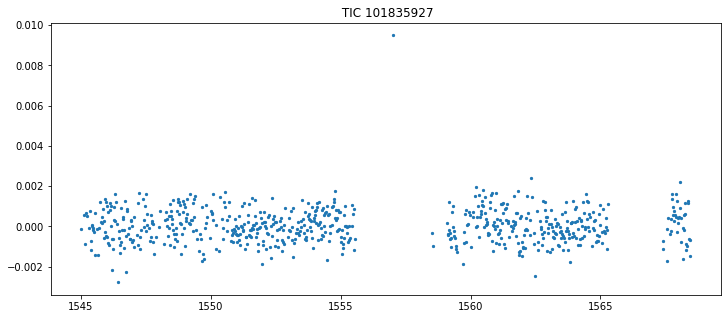

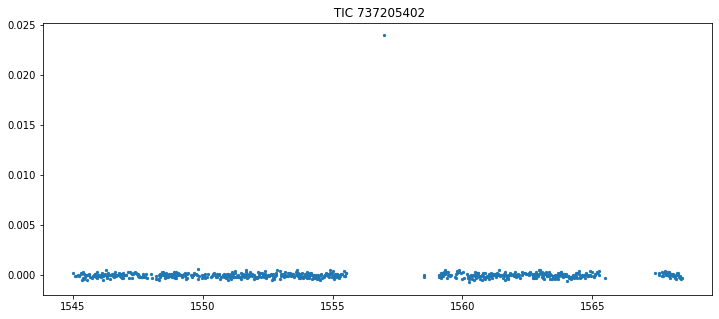

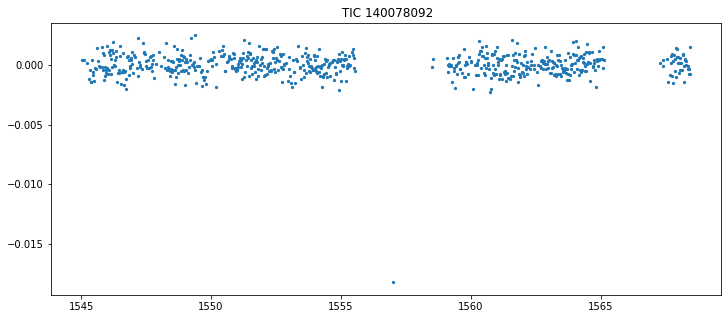

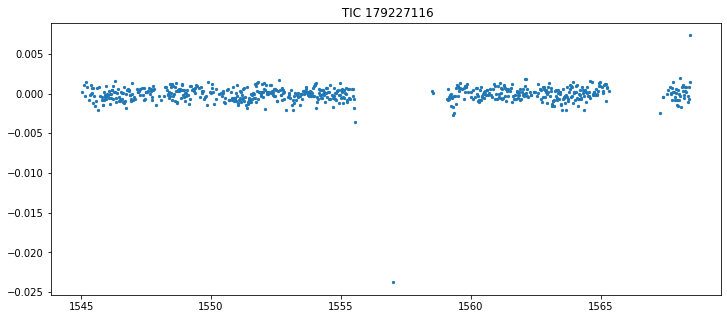

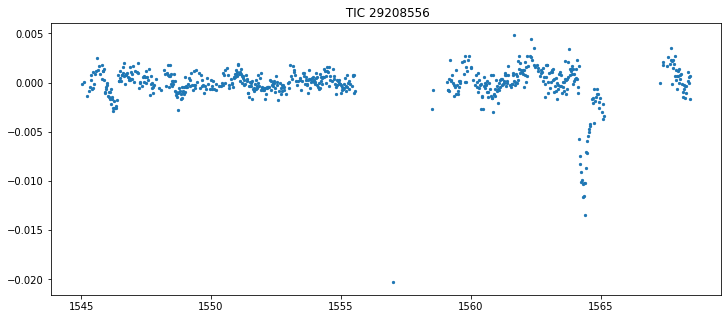

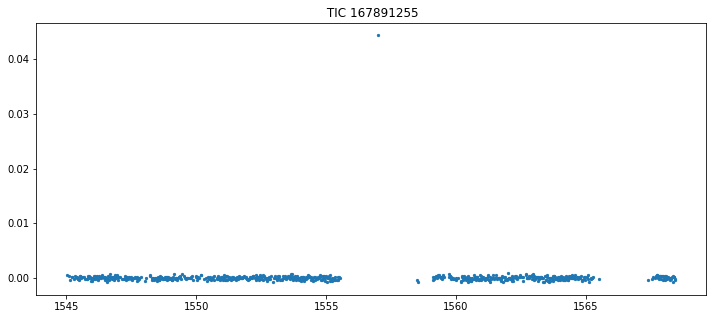

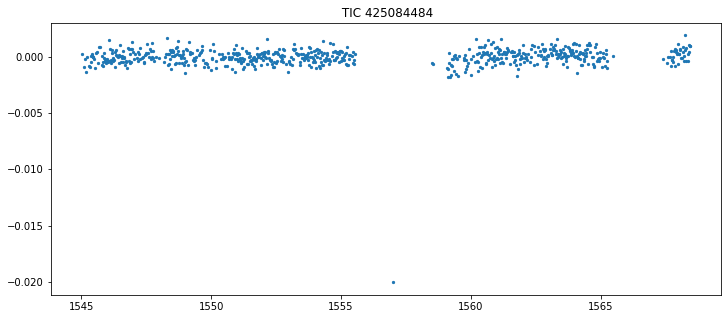

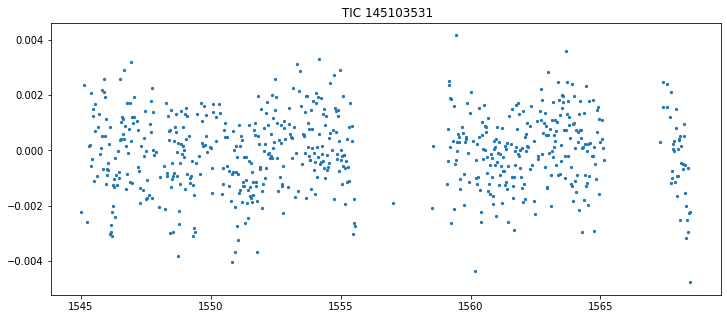

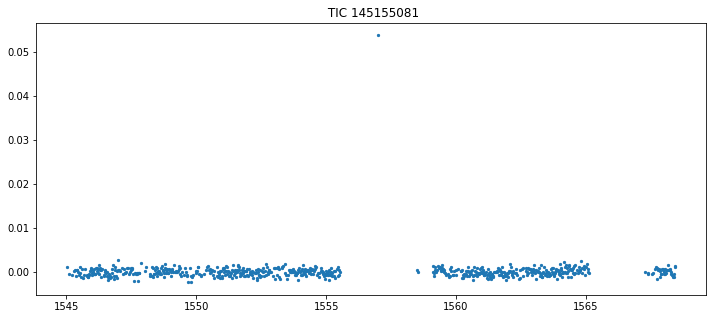

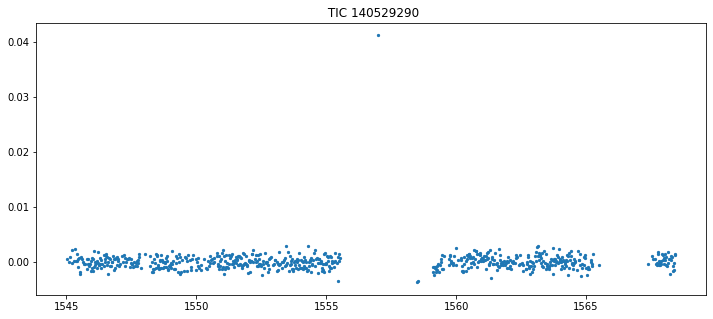

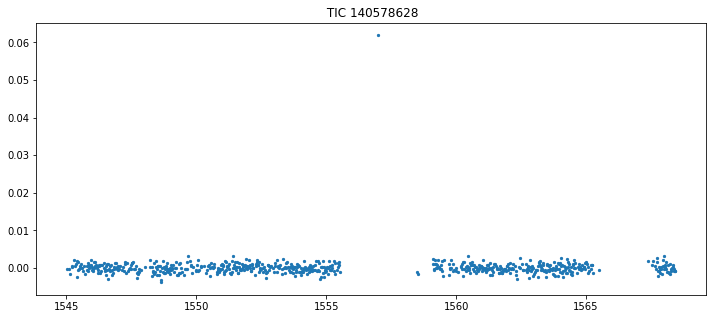

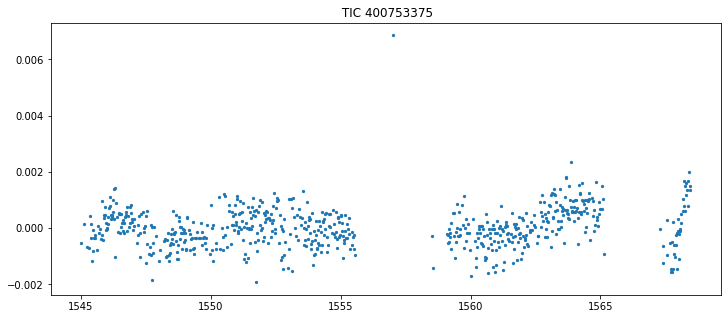

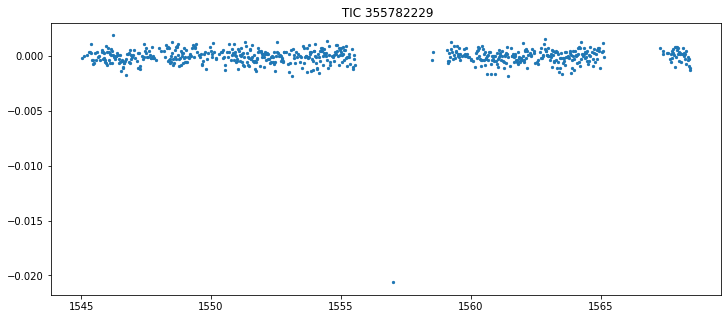

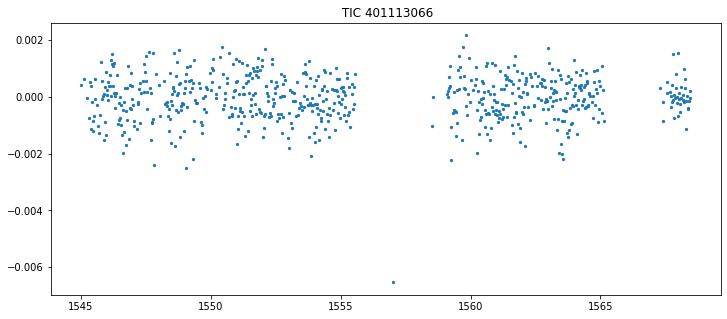

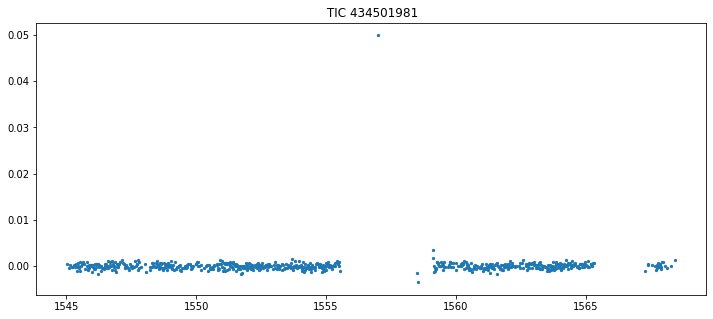

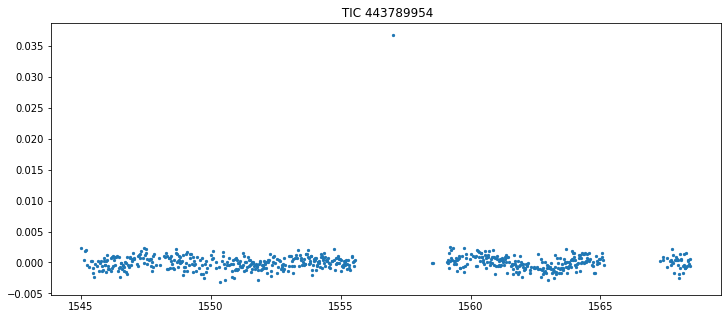

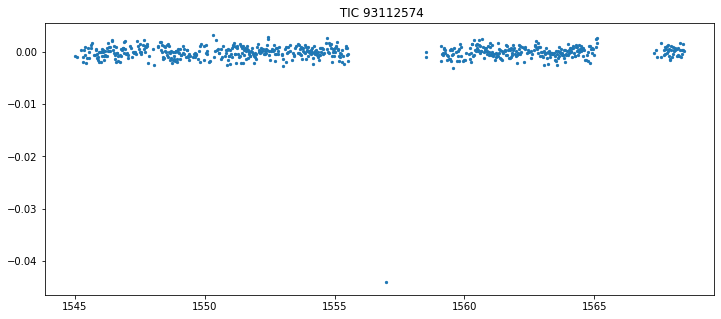

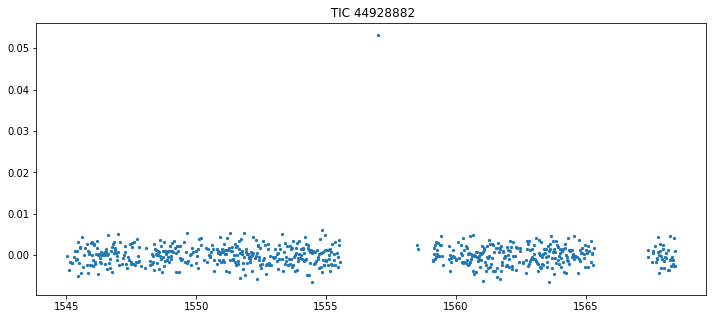

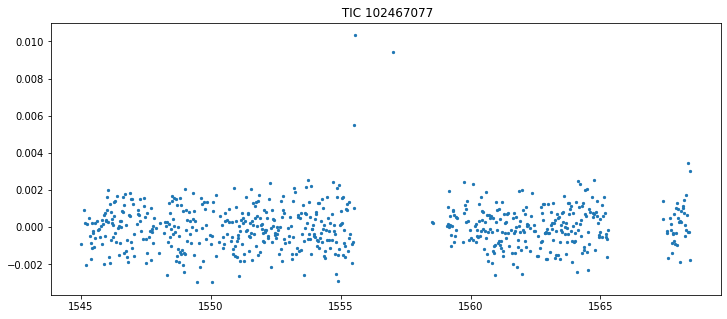

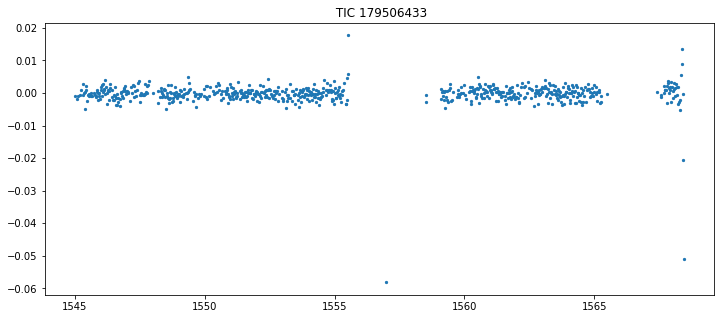

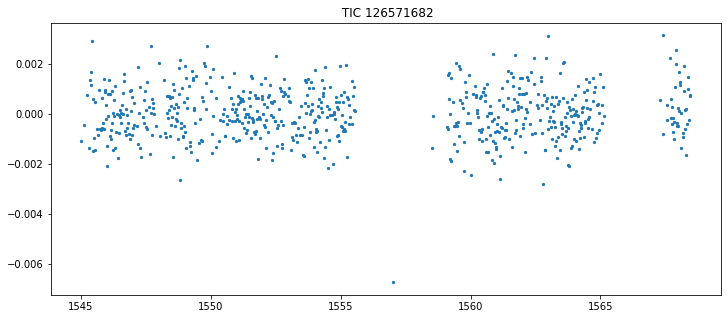

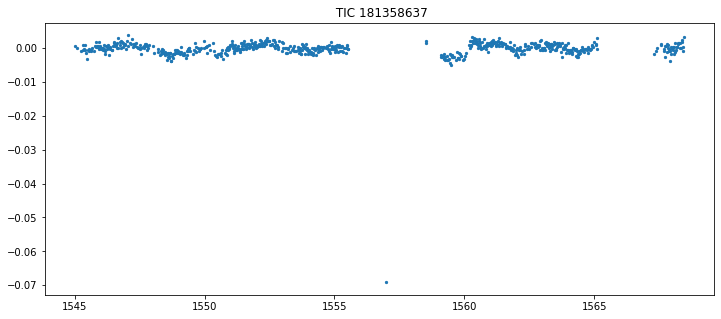

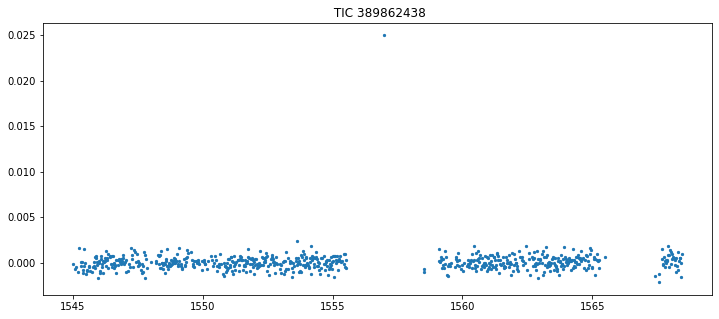

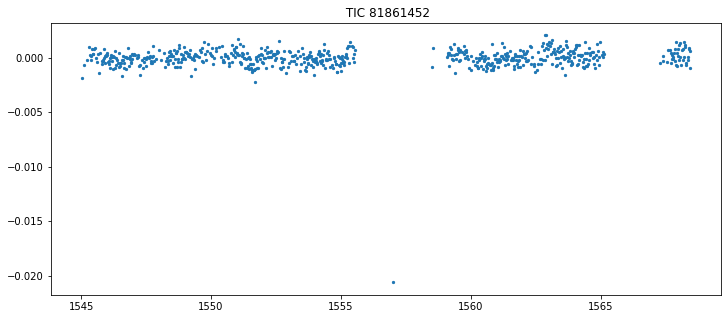

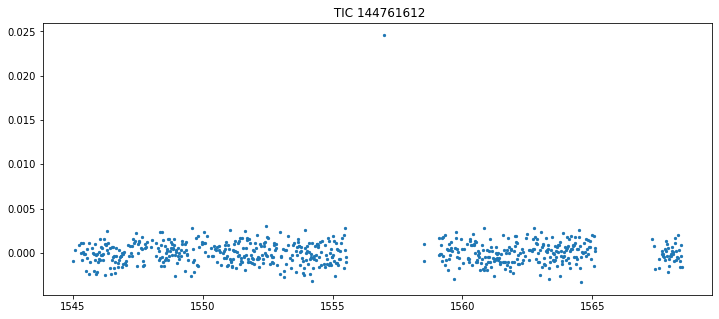

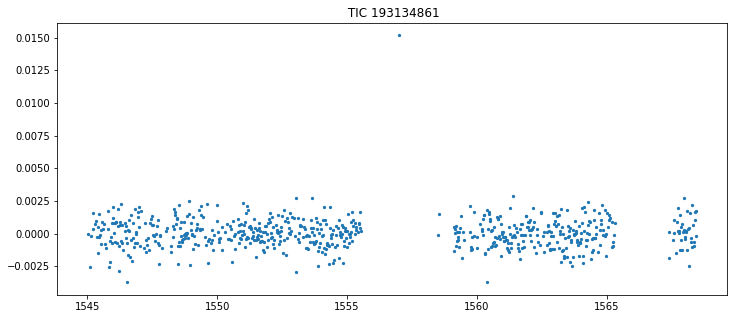

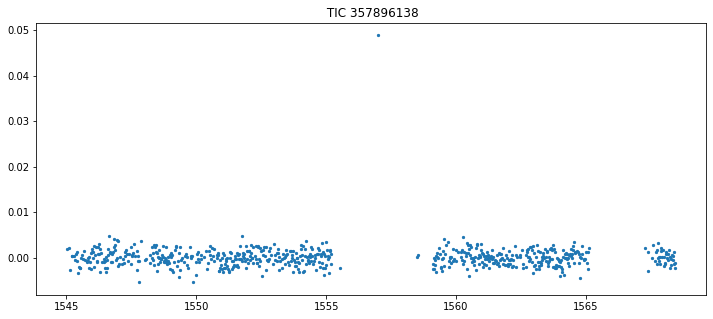

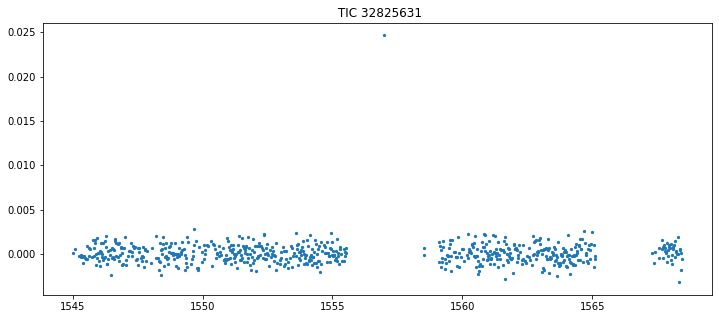

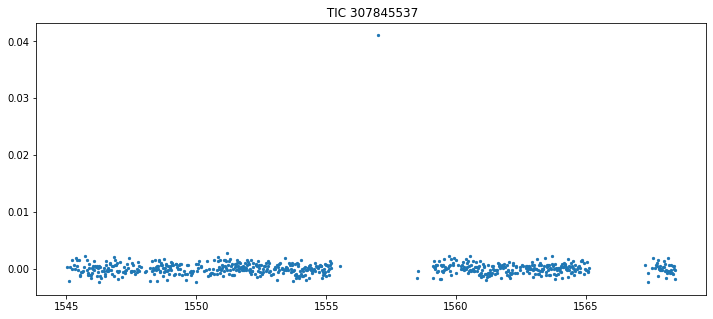

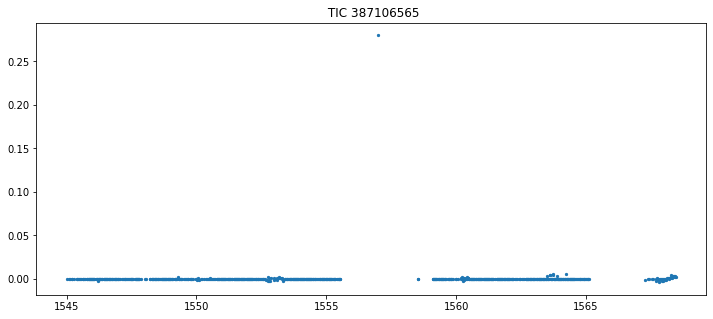

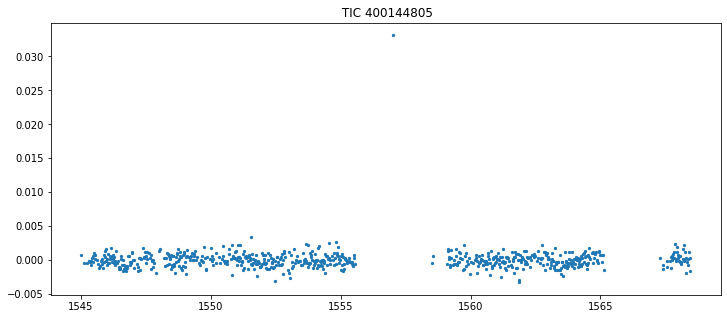

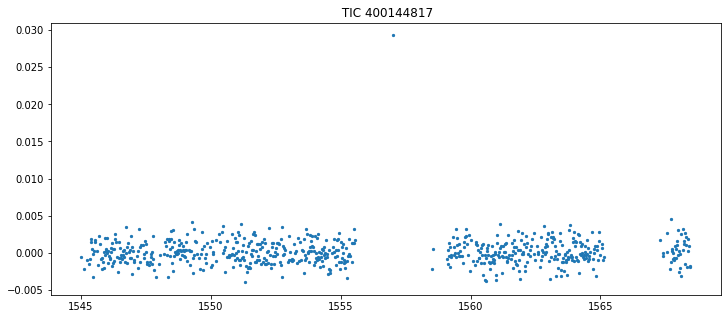

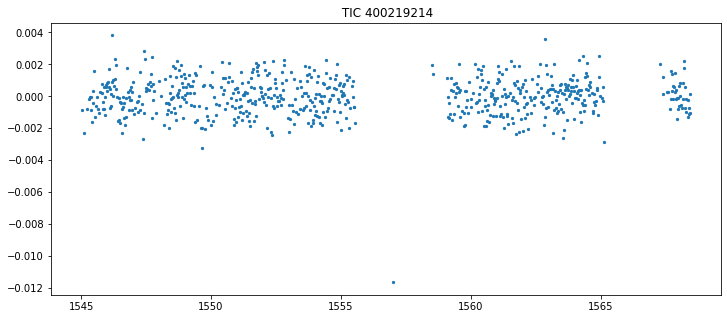

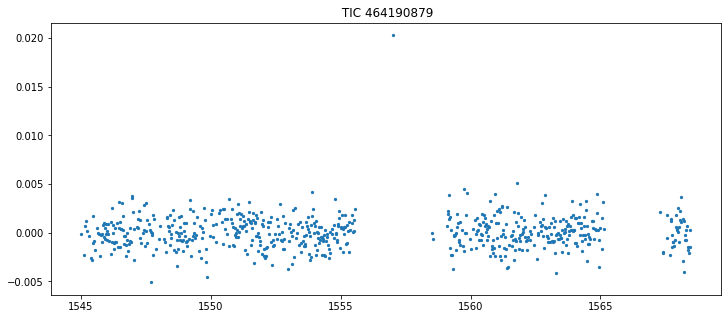

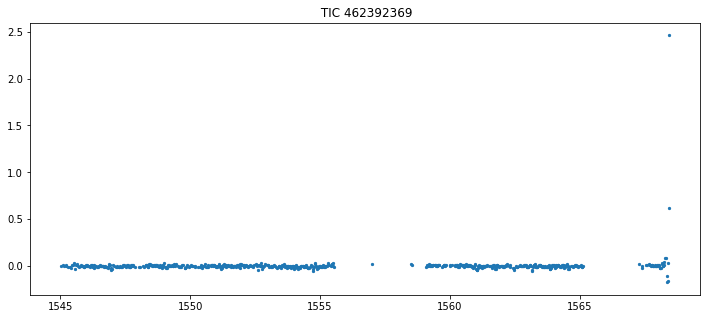

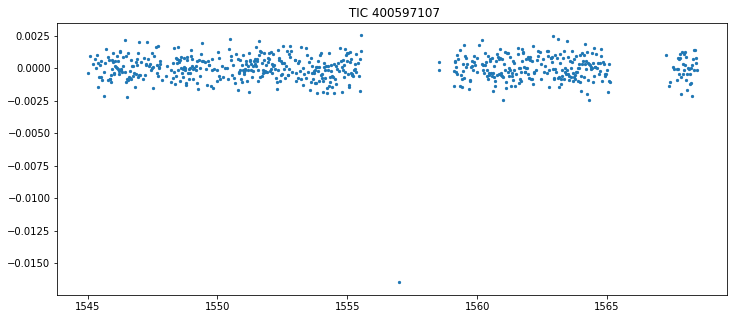

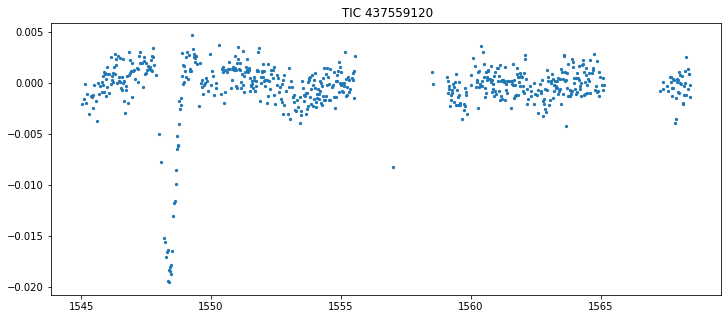

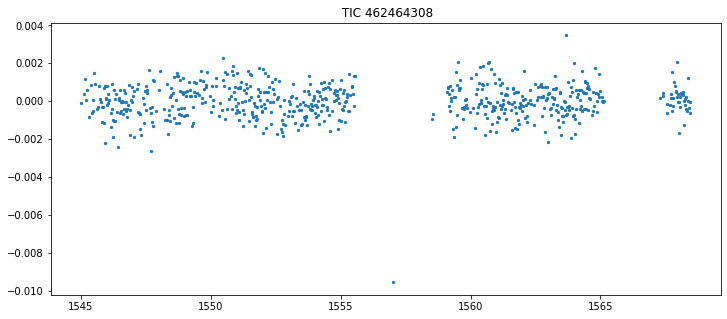

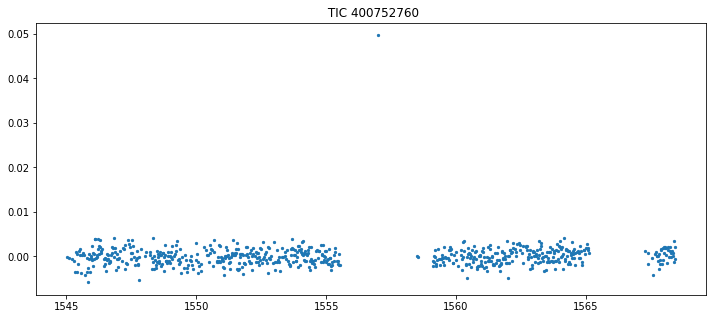

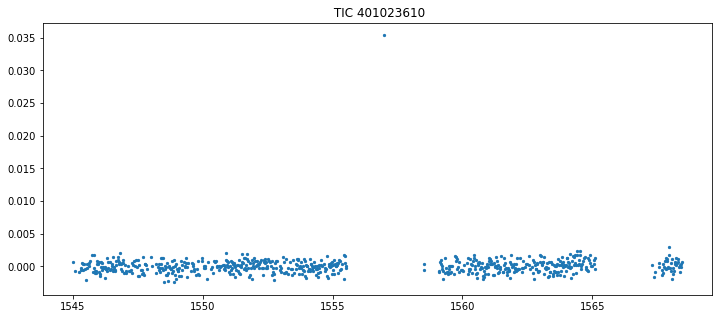

In [17]:
for i in data_new[(data_new.time >= bin_left_edge) & (data_new.time <= bin_right_edge)].abs_path.head(50): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()